In [57]:
import pandas as ts1

#To work with numerical operations
import numpy as np

#To visualize the data
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = ts1 .read_csv(url)
print ('data is imported successfully')

data is imported successfully


In [59]:
#To check variables data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [60]:
# checking null(missing) values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [61]:
# summary of numerical variables
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [62]:
#Relationship between independent variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


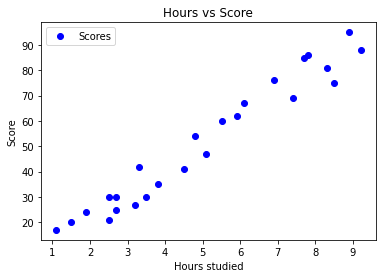

In [63]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o' ,c= 'Blue')  
plt.title('Hours vs Score')  
plt.xlabel('Hours studied')  
plt.ylabel('Score')  
plt.show()

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

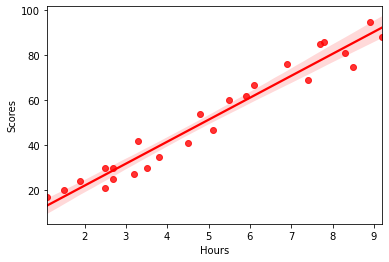

In [64]:
#Plotting the Regressionline
sb.regplot(x=df['Hours'],y=df['Scores'] , color='red' )

In [65]:
#storing the x & y values
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [66]:
#To partition the data
from sklearn.model_selection import train_test_split 

#splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [67]:
#importing libraries for linear regression 
from sklearn.linear_model import LinearRegression

#Make an instance for the model  
model = LinearRegression()  

#Fitting the values for x & y
model.fit(x_train, y_train)
print("Training complete.")

Training complete.


In [68]:
# Predicting the scores
y_pred = model.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [69]:
# Comparing Actual vs Predicted
df = ts1.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [70]:
# What will be predicted score if a student studies for 9.25 hrs/ day?
hours = [[9.25]]
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


In [71]:
# for calculating metrics
from sklearn  import metrics

In [72]:
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error : 4.183859899002982


In [73]:
print('Mean Squared Error :',metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error : 21.598769307217456


In [74]:
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 4.647447612100373
